In [21]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

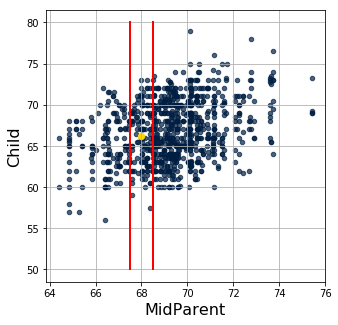

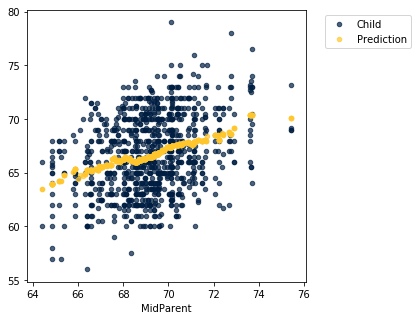

In [42]:
# 8.1 Appying function

def cut_off_at_100(x):
    return min(x, 100)

cut_off_at_100(17)
cut_off_at_100(170)

ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages
ages.with_column('Cut Off Age', ages.apply(cut_off_at_100, 'Age'))

galton = Table.read_table('galton.csv')
galton
heights = galton.select('midparentHeight', 'childHeight').relabeled('midparentHeight', 'MidParent').relabeled('childHeight', 'Child')
heights.scatter('MidParent')
plt.plot([67.5, 67.5], [50, 80], color='Red', lw=2)
plt.plot([68.5, 68.5], [50, 80], color='Red', lw=2)
plt.scatter(68, 66.24, color='gold', s=40)
plt.grid()

close_to_68 = heights.where('MidParent', are.between(67.5, 68.5))
close_to_68
close_to_68.column('Child').mean()

def predict_child(mpht):
    return heights.where('MidParent', are.between(mpht-0.5, mpht+0.5)).column('Child').mean()

heights_with_predictions = heights.with_column('Prediction', heights.apply(predict_child, 'MidParent'))
heights_with_predictions
heights_with_predictions.scatter('MidParent')

In [63]:
# 8.2 Classification

cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.25)
)
cones
cones.group('Flavor')
cones.group('Flavor', sum)
cones.group('Flavor', max)

nba1 = Table.read_table('nba_salaries.csv')
nba = nba1.relabeled('2015-2016 SALARY', 'SALARY')
nba.select('TEAM', 'SALARY').group('TEAM', sum)
nba.group('POSITION')
nba.select('POSITION', 'SALARY').group('POSITION', np.mean)

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


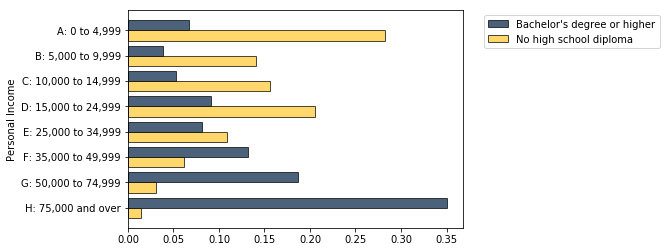

In [96]:
# 8.3 Corss-Classification

more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

more_cones
more_cones.group('Flavor')
more_cones.group(['Flavor', 'Color'])
more_cones.group(['Flavor', 'Color'], sum)
more_cones.pivot('Flavor', 'Color')
#more_cones.pivot('Color', 'Flavor')
more_cones.pivot('Flavor', 'Color', values='Price', collect=sum)

full_table = Table.read_table('educ_inc.csv')
full_table
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17'))
ca_2014
educ_inc = ca_2014.select('Educational Attainment', 'Personal Income', 'Population Count')
educ_inc
educ_totals = educ_inc.select('Educational Attainment', 'Population Count').group('Educational Attainment', sum)

educ_distribution = educ_totals.with_columns(
    'Population Percent', educ_totals.column('Population Count sum')/sum(educ_totals.column(1))
).set_format('Population Percent', PercentFormatter)
educ_distribution

totals = educ_inc.pivot('Educational Attainment', 'Personal Income', values='Population Count', collect=sum)

distributions = totals.select(0).with_columns(
    "Bachelor's degree or higher", totals.column(1) / sum(totals.column(1)),
    'College, less than 4-yr degree', totals.column(2) / sum(totals.column(2)),
    'High school or equivalent', totals.column(3) / sum(totals.column(3)),
    'No high school diploma', totals.column(4) / sum(totals.column(4))
).set_format([1,2,3,4], PercentFormatter)
distributions
distributions.select([0,1,4]).barh(0)

In [102]:
# 8.4 Joining Tables
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'vanilla', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.75)
)
cones

ratings = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'vanilla'),
    'Stars', make_array(2.5, 3.5, 4)
)
ratings
rated = cones.join('Flavor', ratings, 'Kind')
rated.with_column('$/Star', rated.column('Price') / rated.column('Stars')).sort(3)

Flavor,Price,Stars,$/Star
vanilla,4.75,4,1.1875
strawberry,3.55,2.5,1.42
chocolate,5.75,3.5,1.64286
chocolate,6.55,3.5,1.87143
strawberry,5.25,2.5,2.1


In [118]:
# 8.5 Bike Sharing in the Bay Area
trips = Table.read_table('trip.csv')
trips
commute = trips.where('Duration', are.below(1800))
#commute.hist('Duration', bins=60, unit='Second')
#commute.group('Start Station').sort('count', descending=True)
#commute.group(['Start Station', 'End Station'])
#commute.pivot('Start Station', 'End Station')

stations = Table.read_table('station.csv')
stations
#Marker.map_table(stations.select('lat', 'long', 'name'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/maps.py:368: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
  f(**self._folium_kwargs)
